In [2]:
import pandas as pd
from datetime import datetime
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
# Set up paths
data_folder = r'Data\taxi_log_2008_by_id'
full_path = os.path.join(os.getcwd(), data_folder)

In [4]:
# Read all taxi files
all_files = [os.path.join(full_path, f) for f in os.listdir(full_path) if f.endswith('.txt')]
df_list = []
for file in all_files:
    temp = pd.read_csv(file, header=None, names=['taxiId', 'timestamp', 'longitude', 'latitude'])
    df_list.append(temp)
df = pd.concat(df_list, ignore_index=True)

C:\Users\atomi\AppData\Local\Temp\ipykernel_21776\2476984194.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list, ignore_index=True)


In [5]:
# Parse timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')

In [6]:
#display random 20 rows of the dataframe df
print(df.sample(20))

         taxiId           timestamp  longitude  latitude
947677     1275 2008-02-06 06:25:55  116.39765  39.97269
16348669   9296 2008-02-04 08:47:08  116.49910  40.02216
1920458    1770 2008-02-07 20:57:20  116.37515  39.97138
7566001    4798 2008-02-07 06:38:49  116.35209  39.93908
5380727    3619 2008-02-05 15:14:31  116.39338  39.92245
2973617    2387 2008-02-05 08:27:33  116.52753  39.96686
15269952   8731 2008-02-08 16:52:47  116.37587  39.88803
14832667   8602 2008-02-06 03:28:03  116.35945  39.79603
1590147    1580 2008-02-04 13:45:17  116.38690  39.90602
7433742    4745 2008-02-04 22:40:18  116.41217  39.89543
8087160    5065 2008-02-07 22:23:12  116.46447  39.98065
12761811   7441 2008-02-06 12:46:17  116.34390  39.89517
12637574   7382 2008-02-06 15:18:43  116.45997  39.99608
2986328    2398 2008-02-04 16:18:24  116.51145  39.91528
2856360    2313 2008-02-03 11:23:05  116.31538  39.90280
11394278   6772 2008-02-07 10:45:18  117.08985  40.13838
12325478   7195 2008-02-02 22:2

In [7]:
#sort and merge by timestamp (as priority) then by taxiId if the timestamps are the same
df = df.sort_values(by=['timestamp', 'taxiId']).reset_index(drop=True)
print(df.head(20))

   taxiId           timestamp  longitude  latitude
0    3015 2008-02-02 13:30:44  116.41036  39.89171
1    3579 2008-02-02 13:30:44  116.40048  39.90350
2    6275 2008-02-02 13:30:44  116.36838  39.90484
3    3015 2008-02-02 13:30:45  116.41028  39.89170
4    3579 2008-02-02 13:30:45  116.40049  39.90341
5    6275 2008-02-02 13:30:45  116.36838  39.90484
6    7659 2008-02-02 13:30:45  116.35203  39.84086
7    7659 2008-02-02 13:30:45  116.35203  39.84086
8    7659 2008-02-02 13:30:45  116.35203  39.84086
9    7659 2008-02-02 13:30:45  116.35203  39.84086
10   7659 2008-02-02 13:30:45  116.35203  39.84086
11   7659 2008-02-02 13:30:45  116.35203  39.84086
12   7659 2008-02-02 13:30:45  116.35203  39.84086
13   7659 2008-02-02 13:30:45  116.35203  39.84086
14   7659 2008-02-02 13:30:45  116.35203  39.84086
15   7659 2008-02-02 13:30:45  116.35203  39.84086
16   7659 2008-02-02 13:30:45  116.35203  39.84086
17   7659 2008-02-02 13:30:45  116.35203  39.84086
18   7659 2008-02-02 13:30:45  

In [8]:
print(df.sample(20))

         taxiId           timestamp  longitude  latitude
12894495   3945 2008-02-06 19:07:00  116.32560  39.97508
13060326   8407 2008-02-06 20:26:05  115.83000  40.48055
7875628     366 2008-02-05 00:19:32  116.44940  39.80637
17426206   8949 2008-02-08 15:56:29  116.30681  39.88091
17548279   7673 2008-02-08 16:49:47  116.42343  39.90702
16441107   7430 2008-02-08 08:07:46  116.35950  39.84442
8120304    7626 2008-02-05 03:03:39  116.37908  39.94771
13770455   2617 2008-02-07 04:13:02  116.34662  39.89482
14490658   3940 2008-02-07 12:45:37  116.74516  40.06248
16045106   4038 2008-02-08 02:48:36  116.65655  40.10604
6127122    9937 2008-02-04 12:46:02  116.40520  39.90662
4686520   10217 2008-02-04 00:18:44  116.35012  39.94713
16197619    369 2008-02-08 04:47:48  116.77232  39.73079
12374325   3078 2008-02-06 15:07:40  116.35775  39.87572
5647812    8886 2008-02-04 09:49:33  116.44339  39.82572
12618711     55 2008-02-06 17:01:02  116.44158  39.97706
10699579   8249 2008-02-05 22:2

In [10]:
#check latitude for outliers
print(df['latitude'].describe())

count    1.766298e+07
mean     3.984973e+01
std      1.904082e+00
min      0.000000e+00
25%      3.987953e+01
50%      3.992271e+01
75%      3.998121e+01
max      9.606767e+01
Name: latitude, dtype: float64


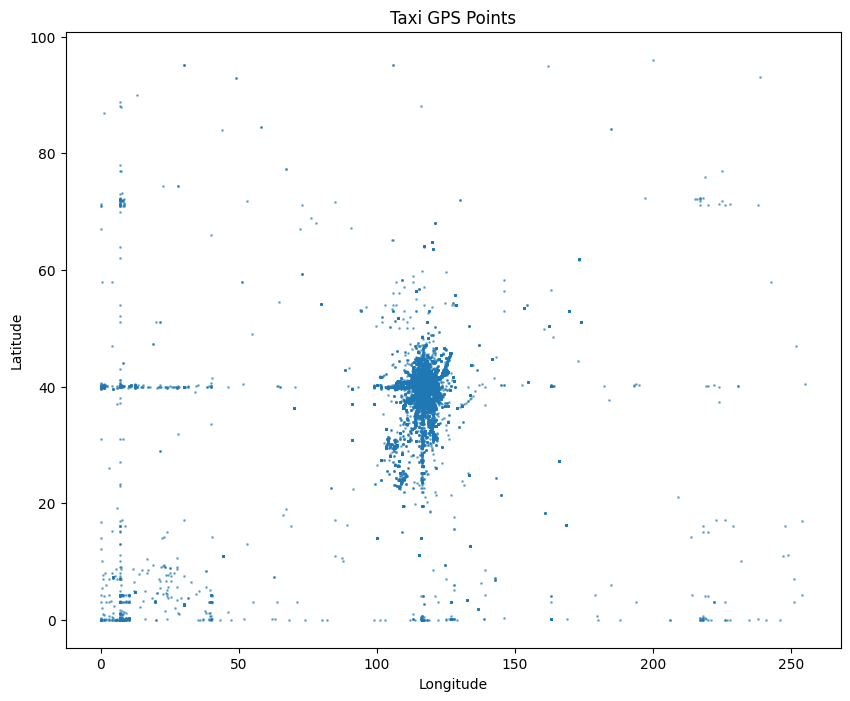

In [12]:
# Plot the latitude and longitude of the taxis
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], s=1, alpha=0.5)
plt.title('Taxi GPS Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
def calculate_distance(df):
    df['distance'] = 0.0
    for i in range(1, len(df)):
        coords_1 = (df.iloc[i-1]['latitude'], df.iloc[i-1]['longitude'])
        coords_2 = (df.iloc[i]['latitude'], df.iloc[i]['longitude'])
        df.at[i, 'distance'] = geodesic(coords_1, coords_2).meters
    return df

#for each taxi id, calculate the distance travelled
df_distance_travelled = df.groupby('taxiId').apply(calculate_distance).reset_index(drop=True)



c:\Users\atomi\Documents\Big Data\tax_project_group_A6\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


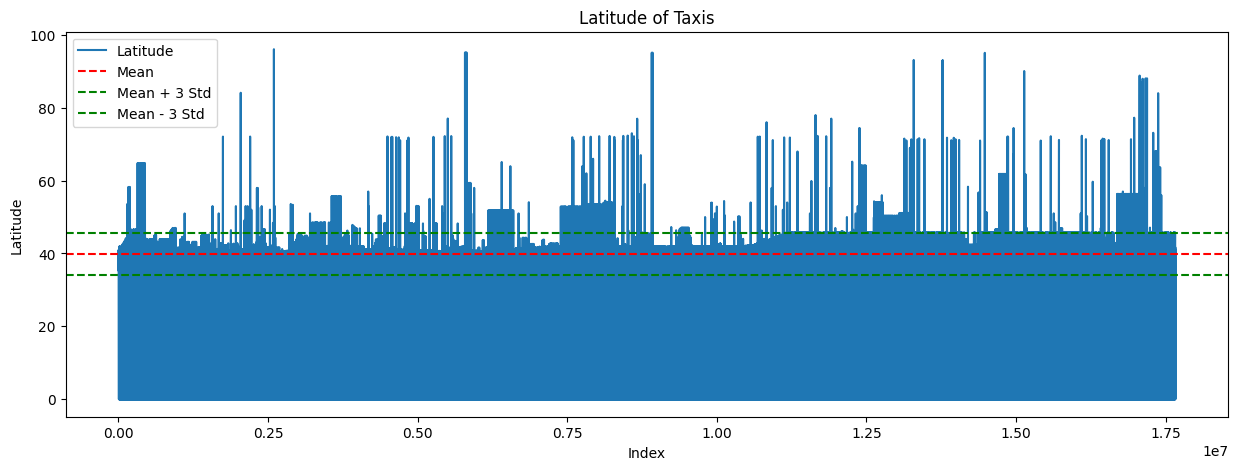

In [ ]:
#plot the latitude and longitude of the taxis and use mean and std to find outliers
plt.figure(figsize=(15, 5))
plt.plot(df['longitude'], label='Longitude')
plt.axhline(df['longitude'].mean(), color='r', linestyle='--', label='Mean')
plt.axhline(df['longitude'].mean() + 3 * df['longitude'].std(), color='g', linestyle='--', label='Mean + 3 Std')
plt.axhline(df['longitude'].mean() - 3 * df['longitude'].std(), color='g', linestyle='--', label='Mean - 3 Std')
plt.title('Longitude of Taxis')
plt.xlabel('Index')
plt.ylabel('Longitude')
plt.legend()
plt.show()
#plot the latitude and longitude of the taxis and use mean and std to find outliers
#plot the latitude and longitude of the taxis and use mean and std to find outliers
#plot the latitude and longitude of the taxis and use mean and std to find outliers

#plot the latitude and longitude of the taxis and use mean and std to find outliers
#plot the latitude and longitude of the taxis and use mean and std to find outliers
#plot the latitude and longitude of the taxis and use mean and std to find outliers

#plot the latitude and longitude of the taxis




"""
plt.figure(figsize=(15, 5))
plt.plot(df['latitude'], label='Latitude')
plt.axhline(df['latitude'].mean(), color='r', linestyle='--', label='Mean')
plt.axhline(df['latitude'].mean() + 3 * df['latitude'].std(), color='g', linestyle='--', label='Mean + 3 Std')
plt.axhline(df['latitude'].mean() - 3 * df['latitude'].std(), color='g', linestyle='--', label='Mean - 3 Std')
plt.title('Latitude of Taxis')
plt.xlabel('Index')
plt.ylabel('Latitude')
plt.legend()
plt.show()
"""


In [ ]:
# Calculate distances and speeds between consecutive points
df['distance_km'] = 0.0
df['speed_kmph'] = 0.0

for i in range(1, len(df)):
    prev_point = (df.loc[i-1, 'latitude'], df.loc[i-1, 'longitude'])
    curr_point = (df.loc[i, 'latitude'], df.loc[i, 'longitude'])
    distance = geodesic(prev_point, curr_point).kilometers
    time_diff = (df.loc[i, 'timestamp'] - df.loc[i-1, 'timestamp']).total_seconds() / 3600.0  # hours
    speed = distance / time_diff if time_diff > 0 else 0
    df.loc[i, 'distance_km'] = distance
    df.loc[i, 'speed_kmph'] = speed

# Calculate key statistics
total_distance = df['distance_km'].sum()
average_speed = df['speed_kmph'].mean()
max_speed = df['speed_kmph'].max()
min_speed = df['speed_kmph'].min()

# Define Forbidden City coordinates (approx.)
forbidden_city = (39.9163, 116.3971)

# Check which entries are outside the 10km boundary
df['outside_10km'] = df.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), forbidden_city).kilometers > 10,
    axis=1
)

# Visualizations
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Speed plot
axs[0].plot(df['timestamp'], df['speed_kmph'], marker='o', label='Speed (km/h)')
axs[0].set_title('Speed over Time')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Speed (km/h)')
axs[0].legend()

# Distance plot
axs[1].plot(df['timestamp'], df['distance_km'].cumsum(), marker='x', label='Cumulative Distance (km)', color='green')
axs[1].set_title('Cumulative Distance over Time')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Distance (km)')
axs[1].legend()

plt.tight_layout()

# Return the processed DataFrame and key stats
df[['timestamp', 'latitude', 'longitude', 'distance_km', 'speed_kmph', 'outside_10km']], total_distance, average_speed, max_speed, min_speed

